In [130]:
import numpy as np
import pandas as pd

##1. Load the dataset into python environment

In [132]:
titanic = pd.read_csv('/content/titanic_dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##2. Make ‘PassengerId’ as the index column

In [133]:
titanic.set_index('PassengerId',inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##3. Check the basic details of the dataset

In [134]:
#Size of Dataframe
titanic.shape

(891, 11)

In [135]:
# Data types of columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [136]:
# If we want to see only the variable names,
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [137]:
#statistics of the numerical and categorical columns
titanic.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##4. Fill in all the missing values present in all the columns in the dataset

In [138]:
# check for null values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [139]:
#Replacing missing values in 'Age'
mean_age=titanic['Age'].mean()
titanic['Age']= titanic['Age'].fillna(mean_age)
#checking null values for 'Age'
titanic.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [140]:
#Replacing missing values in 'Cabin'
titanic['Cabin']=titanic['Cabin'].fillna(titanic['Cabin'].mode()[0])
#checking null values for 'Cabin'
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [141]:
#Replacing missing values in 'Embarked'
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
#checking null values for 'Embarked'
titanic.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

##5. Check and handle outliers in at least 3 columns in the dataset

Checking Outliers in 3 columns like Fare, SibSp, Parch

In [142]:
#There are different ways and methods of identifying outliers. Here am using Box Plot
import matplotlib.pyplot as plt



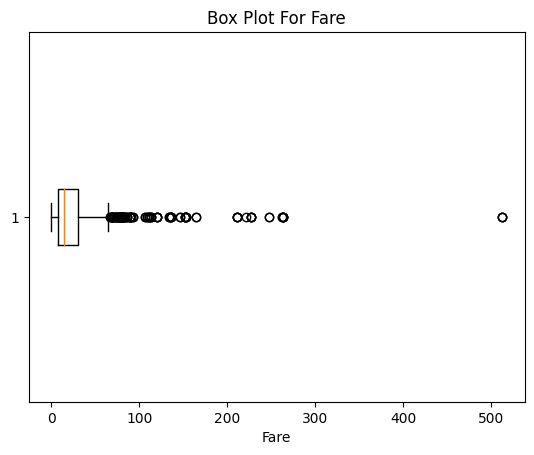

In [143]:
#Fare
plt.boxplot(titanic['Fare'], vert=False)
plt.xlabel('Fare')
plt.title('Box Plot For Fare')
plt.show()

From the above  boxplot, the black circular points which  show the presence of extreme values in the variable.

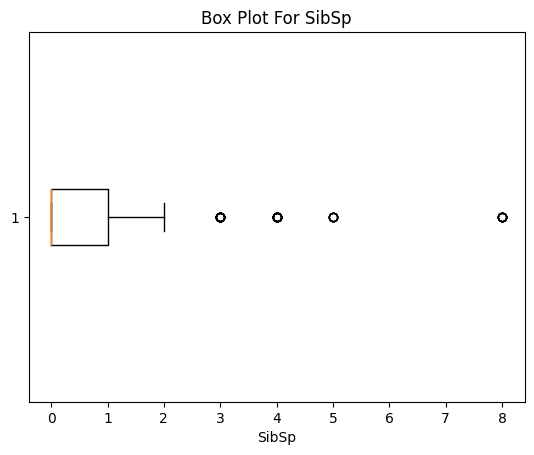

In [144]:
#Number of siblings or spouses aboard the titanic (SibSp)
plt.boxplot(titanic['SibSp'], vert=False)
plt.xlabel('SibSp')
plt.title('Box Plot For SibSp')
plt.show()

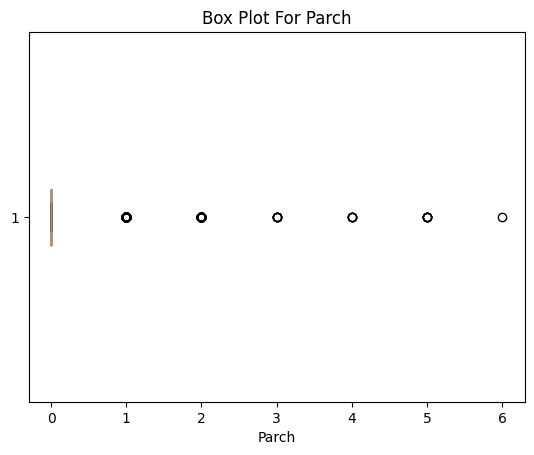

In [145]:
#Number of parents or children aboard the titanic (Parch)
plt.boxplot(titanic['Parch'], vert=False)
plt.xlabel('Parch')
plt.title('Box Plot For Parch')
plt.show()

By using a boxplot, We can easily interpret our variable if it has outliers. Outliers can be easily removed from our dataset. To remove Outliers, here am using IQR Method

In [158]:
#fare
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23.0896


After obtaining Inter Quantile Range, we can use the IQR method to see outliers or remove them from the dataset.

In [159]:
lower=Q1-1.5* IQR
upper=Q3+1.5* IQR
print("The value of upper bound is:",round(upper))
print("The value of lower bound is:",round(lower))
sorts=titanic['Fare'].sort_values()
sorts

The value of upper bound is: 66
The value of lower bound is: -27


PassengerId
272      0.0000
598      0.0000
303      0.0000
634      0.0000
278      0.0000
         ...   
439    263.0000
342    263.0000
738    512.3292
259    512.3292
680    512.3292
Name: Fare, Length: 891, dtype: float64

In [160]:
clean_data=sorts[~((sorts>(upper))  |  (sorts<(lower)))]
clean_data


PassengerId
272     0.0000
598     0.0000
303     0.0000
634     0.0000
278     0.0000
        ...   
156    61.3792
55     61.9792
98     63.3583
755    65.0000
616    65.0000
Name: Fare, Length: 775, dtype: float64

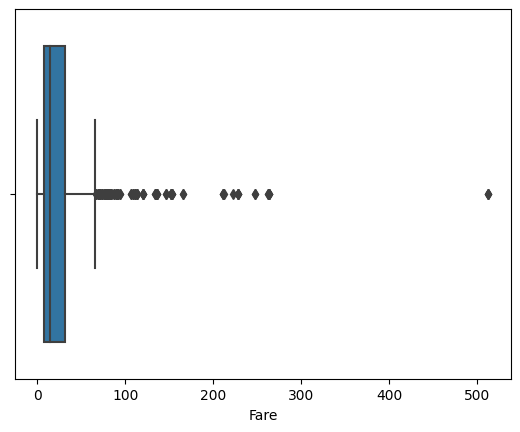

In [161]:
#Boxplot Before removing outliers
import seaborn as sns
sns.boxplot(x='Fare', data=titanic)
plt.show()



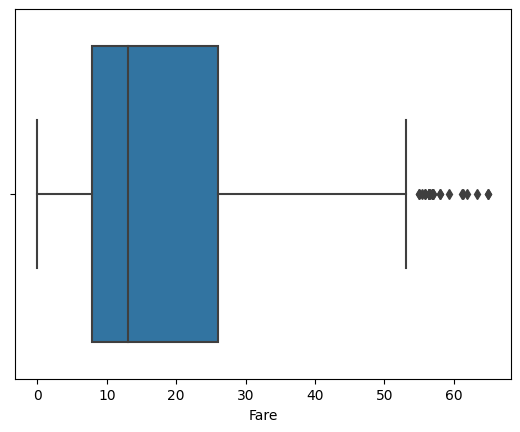

In [162]:
#Boxplot after removing outliers
sns.boxplot(x=clean_data)
plt.show()

In [163]:
#To handle Outliers in SibSp
Q1 = titanic['SibSp'].quantile(0.25)
Q3 = titanic['SibSp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [164]:
lower=Q1-1.5* IQR
upper=Q3+1.5* IQR
print("The value of upper bound is:",round(upper))
print("The value of lower bound is:",round(lower))
sorts=titanic['SibSp'].sort_values()
sorts

The value of upper bound is: 2
The value of lower bound is: -2


PassengerId
446    0
535    0
536    0
537    0
538    0
      ..
181    8
864    8
202    8
160    8
793    8
Name: SibSp, Length: 891, dtype: int64

In [165]:
clean_data=sorts[~((sorts>(upper))  |  (sorts<(lower)))]
clean_data

PassengerId
446    0
535    0
536    0
537    0
538    0
      ..
470    2
743    2
105    2
49     2
302    2
Name: SibSp, Length: 845, dtype: int64

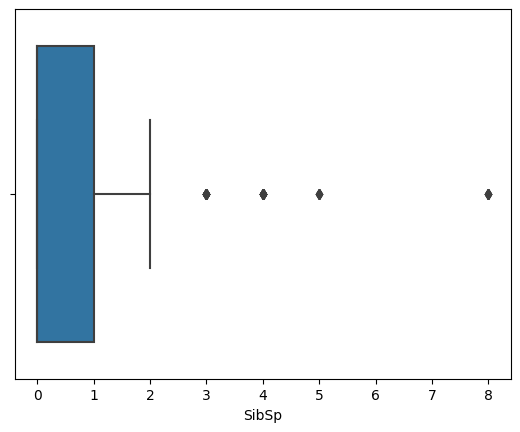

In [166]:
#Boxplot Before removing outliers
sns.boxplot(x='SibSp', data=titanic)
plt.show()

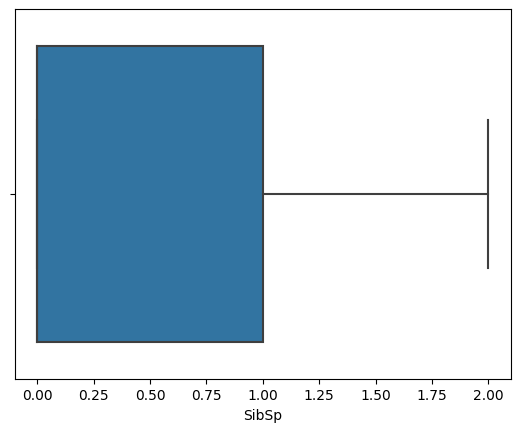

In [167]:
#Boxplot after removing outliers
sns.boxplot(x=clean_data)
plt.show()

In [168]:
#To handle Outliers in Parch
Q1 = titanic['Parch'].quantile(0.25)
Q3 = titanic['Parch'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.0


In [169]:
lower=Q1-1.5* IQR
upper=Q3+1.5* IQR
print("The value of upper bound is:",round(upper))
print("The value of lower bound is:",round(lower))
sorts=titanic['Parch'].sort_values()
sorts

The value of upper bound is: 0
The value of lower bound is: 0


PassengerId
1      0
546    0
547    0
548    0
552    0
      ..
14     5
26     5
886    5
639    5
679    6
Name: Parch, Length: 891, dtype: int64

In [170]:
clean_data=sorts[~((sorts>(upper))  |  (sorts<(lower)))]
clean_data

PassengerId
1      0
546    0
547    0
548    0
552    0
      ..
285    0
362    0
369    0
278    0
284    0
Name: Parch, Length: 678, dtype: int64

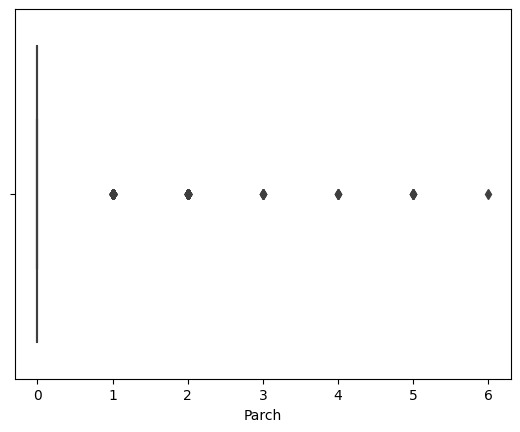

In [171]:
#Boxplot Before removing outliers
sns.boxplot(x='Parch', data=titanic)
plt.show()

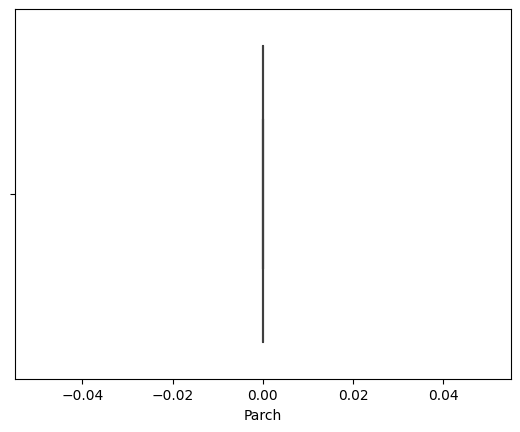

In [172]:
#Boxplot after removing outliers
sns.boxplot(x=clean_data)
plt.show()

##6.Do min max scaling on the feature set (Take ‘Survived’ as target)

In [31]:
# import module
from sklearn.preprocessing import MinMaxScaler
# scale features
min_max=MinMaxScaler()
titanic[['Survived']]=min_max.fit_transform(titanic[['Survived']])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
